In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
data = np.load("/content/drive/MyDrive/Colab Notebooks/Tablut/dataset_moves.npy", allow_pickle=True)

In [3]:
data.shape

(869,)

In [4]:
print(data[:3])

[array([['e4', 'f4']], dtype='<U2') array([['f5', 'f4'],
                                           ['e2', 'i2'],
                                           ['d5', 'd4'],
                                           ['h5', 'h3'],
                                           ['e6', 'd6'],
                                           ['i6', 'f6'],
                                           ['e7', 'g7'],
                                           ['d1', 'b1'],
                                           ['e5', 'e7'],
                                           ['f6', 'e6']], dtype='<U2')
 array([['d5', 'd4'],
        ['h5', 'h9'],
        ['e6', 'd6'],
        ['e2', 'b2'],
        ['f5', 'f6'],
        ['e8', 'b8'],
        ['e4', 'f4'],
        ['b2', 'a2'],
        ['c5', 'c4'],
        ['d1', 'b1'],
        ['e3', 'h3'],
        ['e1', 'e2'],
        ['e5', 'e3'],
        ['b5', 'b3'],
        ['e3', 'g3'],
        ['e2', 'g2'],
        ['h3', 'h1'],
        ['i4', 'g4']], dtype='<U2')]


In [5]:
data2 = np.load("/content/drive/MyDrive/Colab Notebooks/Tablut/dataset_results.npy", allow_pickle=True)

In [6]:
data2.shape

(869,)

In [7]:
print(data2)

['I' 'B' 'B' 'B' 'W' 'W' 'D' 'B' 'W' 'W' 'W' 'B' 'W' 'W' 'W' 'W' 'B' 'W'
 'D' 'W' 'W' 'B' 'B' 'W' 'W' 'W' 'D' 'B' 'B' 'D' 'B' 'B' 'B' 'W' 'W' 'B'
 'B' 'W' 'B' 'W' 'W' 'W' 'W' 'W' 'W' 'B' 'D' 'W' 'B' 'B' 'B' 'I' 'I' 'I'
 'W' 'W' 'W' 'W' 'D' 'W' 'W' 'B' 'B' 'B' 'B' 'B' 'D' 'W' 'I' 'D' 'B' 'B'
 'D' 'W' 'I' 'B' 'B' 'B' 'B' 'I' 'B' 'B' 'W' 'W' 'W' 'W' 'W' 'I' 'B' 'B'
 'W' 'W' 'B' 'B' 'W' 'W' 'I' 'B' 'B' 'B' 'B' 'B' 'I' 'D' 'W' 'W' 'B' 'W'
 'W' 'I' 'I' 'W' 'I' 'W' 'B' 'W' 'B' 'D' 'W' 'W' 'D' 'B' 'W' 'B' 'B' 'W'
 'B' 'B' 'W' 'B' 'B' 'B' 'W' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'W' 'W' 'B' 'D' 'B' 'I' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'W' 'I'
 'B' 'B' 'W' 'B' 'W' 'I' 'W' 'B' 'B' 'B' 'W' 'W' 'I' 'W' 'D' 'B' 'I' 'W'
 'D' 'D' 'D' 'W' 'W' 'W' 'D' 'W' 'W' 'W' 'I' 'W' 'D' 'W' 'W' 'D' 'W' 'W'
 'W' 'B' 'D' 'B' 'B' 'B' 'B' 'B' 'B' 'W' 'I' 'B' 'B' 'W' 'B' 'W' 'W' 'W'
 'B' 'I' 'D' 'B' 'D' 'W' 'B' 'W' 'W' 'D' 'W' 'W' 'B' 'I' 'W' 'I' 'W' 'B'
 'I' 'D' 'W' 'B' 'W' 'B' 'W' 'B' 'I' 'B' 'B' 'B' 'B

In [8]:
def mapping(x):
    if x=="I":
        return np.nan
    if x=="B":
        return 0
    if x=="W":
        return 1
    if x=="D":
        return 0.5

data3=list(map(mapping,data2))

print(data3)

[nan, 0, 0, 0, 1, 1, 0.5, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0.5, 1, 1, 0, 0, 1, 1, 1, 0.5, 0, 0, 0.5, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0.5, 1, 0, 0, 0, nan, nan, nan, 1, 1, 1, 1, 0.5, 1, 1, 0, 0, 0, 0, 0, 0.5, 1, nan, 0.5, 0, 0, 0.5, 1, nan, 0, 0, 0, 0, nan, 0, 0, 1, 1, 1, 1, 1, nan, 0, 0, 1, 1, 0, 0, 1, 1, nan, 0, 0, 0, 0, 0, nan, 0.5, 1, 1, 0, 1, 1, nan, nan, 1, nan, 1, 0, 1, 0, 0.5, 1, 1, 0.5, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0.5, 0, nan, 0, 0, 0, 0, 0, 0, 0, 0, 1, nan, 0, 0, 1, 0, 1, nan, 1, 0, 0, 0, 1, 1, nan, 1, 0.5, 0, nan, 1, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1, 1, nan, 1, 0.5, 1, 1, 0.5, 1, 1, 1, 0, 0.5, 0, 0, 0, 0, 0, 0, 1, nan, 0, 0, 1, 0, 1, 1, 1, 0, nan, 0.5, 0, 0.5, 1, 0, 1, 1, 0.5, 1, 1, 0, nan, 1, nan, 1, 0, nan, 0.5, 1, 0, 1, 0, 1, 0, nan, 0, 0, 0, 0, 1, 0, 0, 1, 1, nan, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, nan, 1, 0.5, 1, nan, 1, 

In [9]:
features = np.array([
    ['-', 'E', 'E', 'C', 'C', 'C', 'E', 'E', '-'],
    ['E', '-', '-', '-', 'C', '-', '-', '-', 'E'],
    ['E', '-', '-', '-', '-', '-', '-', '-', 'E'],
    ['C', '-', '-', '-', 'N', '-', '-', '-', 'C'],
    ['C', 'C', '-', 'N', 'T', 'N', '-', 'C', 'C'],
    ['C', '-', '-', '-', 'N', '-', '-', '-', 'C'],
    ['E', '-', '-', '-', '-', '-', '-', '-', 'E'],
    ['E', '-', '-', '-', 'C', '-', '-', '-', 'E'],
    ['-', 'E', 'E', 'C', 'C', 'C', 'E', 'E', '-']
])

def tablut_final_board_alphanumeric(moves):
    # Initial board setup (9x9 grid)
    board = np.array([
        ['-', '-', '-', 'B', 'B', 'B', '-', '-', '-'],
        ['-', '-', '-', '-', 'B', '-', '-', '-', '-'],
        ['-', '-', '-', '-', 'W', '-', '-', '-', '-'],
        ['B', '-', '-', '-', 'W', '-', '-', '-', 'B'],
        ['B', 'B', 'W', 'W', 'K', 'W', 'W', 'B', 'B'],
        ['B', '-', '-', '-', 'W', '-', '-', '-', 'B'],
        ['-', '-', '-', '-', 'W', '-', '-', '-', '-'],
        ['-', '-', '-', '-', 'B', '-', '-', '-', '-'],
        ['-', '-', '-', 'B', 'B', 'B', '-', '-', '-']
    ])

    # Helper function to convert alphanumeric to (row, col)
    def alphanumeric_to_index(pos):
        col = ord(pos[0]) - ord('a')  # Convert column letter to index
        row = 9 - int(pos[1])         # Convert row number to index
        return row, col

    ###
    def is_capture(pos, piece):
        """
        Check if a move captures any pieces, including special rules for the king.

        Args:
            pos (tuple): Position of the piece that just moved (row, col).
            piece (str): The piece type ('B' or 'W') that just moved.

        Returns:
            list: A list of positions of captured pieces.
        """
        r, c = pos
        enemy = ('W', "K") if piece == "B" else ("B")
        ally = ("B",) if piece == "B" else ('W', "K")
        struct = ("C", "T")  # Camps and throne
        captures = []

        def is_within_bounds(row, col):
            """Check if a position is within the board boundaries."""
            return 0 <= row < board.shape[0] and 0 <= col < board.shape[1]

        # Check all cardinal directions for captures
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            adjacent = (r + dr, c + dc)
            beyond = (r + 2 * dr, c + 2 * dc)

            if is_within_bounds(*beyond):
                if board[adjacent] == "K" and features[adjacent] == "T":
                    if all(
                        board[adjacent[0] + kr, adjacent[1] + kc] == "B"
                        for kr, kc in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                    ):
                        captures.append(adjacent)
                elif board[adjacent] == "K" and features[adjacent]=="N":
                    if all(
                        board[adjacent[0] + kr, adjacent[1] + kc] == "B" or features[adjacent[0] + kr, adjacent[1] + kc]=="T"
                        for kr, kc in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                    ):
                        captures.append(adjacent)
                elif board[adjacent] in enemy:
                    # Standard capture: enemy adjacent, ally or structure beyond
                    if board[beyond] in ally or (
                        features[beyond] in struct and board[beyond] == '-'
                    ):
                        captures.append(adjacent)
        return captures

    ###

    for i, move in enumerate(moves):
        start, end = alphanumeric_to_index(move[0]), alphanumeric_to_index(move[1])
        piece = board[start[0],start[1]]

        # Move the piece
        board[start[0],start[1]] = '-'
        board[end[0],end[1]] = piece

        # Check for captures
        captures = is_capture(end, piece)
        for capture in captures:
            board[capture[0],capture[1]] = '-'

    return board


# Example usage:
moves = data[2][:3]# Example sequence of moves
final_board = tablut_final_board_alphanumeric(moves)
for row in final_board:
    print(" ".join(row))


- - - B B B - B -
- - - - B - - - -
- - - - W - - - -
B - - W - - - - B
B B W - K W W - B
B - - W W - - - B
- - - - W - - - -
- - - - B - - - -
- - - B B B - - -


In [10]:
matchn=27

for i in range(len(data[matchn])+1):
    moves = data[matchn][:i]# Example sequence of moves
    final_board = tablut_final_board_alphanumeric(moves)
    for row in final_board:
        print(" ".join(row))
    if i%2==0:
        print(f"{i} White to move:")
    else:
        print(f"{i} Black to move:")

- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - - B
- - - - W - - - -
- - - - B - - - -
- - - B B B - - -
0 White to move:
- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - - B
- - - - - W - - -
- - - - B - - - -
- - - B B B - - -
1 Black to move:
- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - - B
- - - - B W - - -
- - - - - - - - -
- - - B B B - - -
2 White to move:
- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - - B
- - - - B - - W -
- - - - - - - - -
- - - B B B - - -
3 Black to move:
- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - - B
- - - B - - - W -
- - - - - - - - -
- - - B B B - - -
4 White to move:
- - - B B B - - -
- - - - B - - - -
- - - - W - - - -
B - - - W - - - B
B B W W K W W B B
B - - - W - - -

In [11]:
features = np.array([
    ['-', 'E', 'E', 'C', 'C', 'C', 'E', 'E', '-'],
    ['E', '-', '-', '-', 'C', '-', '-', '-', 'E'],
    ['E', '-', '-', '-', '-', '-', '-', '-', 'E'],
    ['C', '-', '-', '-', 'N', '-', '-', '-', 'C'],
    ['C', 'C', '-', 'N', 'T', 'N', '-', 'C', 'C'],
    ['C', '-', '-', '-', 'N', '-', '-', '-', 'C'],
    ['E', '-', '-', '-', '-', '-', '-', '-', 'E'],
    ['E', '-', '-', '-', 'C', '-', '-', '-', 'E'],
    ['-', 'E', 'E', 'C', 'C', 'C', 'E', 'E', '-']
])

# Initial board and updated features
size = len(features)  # Assuming a square board
throne = None
camps = []
escapes = []  # Escape points to be parsed from the features grid

# Parse features to identify throne, camps, and escapes
for x in range(size):
    for y in range(size):
        if features[x,y] == 'T':
            throne = (x, y)
        elif features[x,y] == 'C':
            camps.append((x, y))
        elif features[x,y] == 'E':
            escapes.append((x, y))


# Precompute Manhattan distances to the nearest escape
lookup_table = {
    (x, y): min(abs(x - ex) + abs(y - ey) for ex, ey in escapes)
    for x in range(size) for y in range(size)
}

In [12]:
def free_path_to_escape(king_pos, board):
    """Checks for unobstructed paths from King to escape positions."""
    paths = []
    x, y = king_pos

    for ex, ey in escapes:
        if x == ex:  # Same row
            if all(board[x,col] == '-' and features[x,col] not in ('C', 'T')
                for col in range(min(y, ey) + 1, max(y, ey))):
                paths.append((ex, ey))
        elif y == ey:  # Same column
            if all(board[row,y] == '-' and features[row,y] not in ('C', 'T')
                for row in range(min(x, ex) + 1, max(x, ex))):
                paths.append((ex, ey))
    return (paths)

def king_mobility(king_pos, board):
  """
  Calculate the mobility of the king (number of valid moves).

  Parameters:
      board (np.ndarray): 2D array representing the board.

  Returns:
      int: Number of valid moves for the king.
  """

  directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right
  mobility = 0

  for d in directions:
      step = 1
      b=True
      while b:
          new_pos = (king_pos[0]+ step * d[0], king_pos[1]+ step * d[1])
          if (0 <= new_pos[0] < 9 and 0 <= new_pos[1] < 9):  # Check bounds and if square is emptyù
              b=False
          elif (board[new_pos] in ("B","W") or features[new_pos] not in ("T","C")):
              b=False
          elif (board[new_pos]=="-"):
              mobility += 1
              step += 1

  return mobility

def board_metrics(board):
    # Find pieces and compute metrics
    king_pos = None
    white_pieces = 0
    black_pieces = 0

    for x in range(size):
        for y in range(size):
            piece = board[x,y]
            if piece == 'W':
                white_pieces += 1
            elif piece == 'B':
                black_pieces += 1
            elif piece == 'K':
                king_pos = (x, y)

    if king_pos is None:
        raise ValueError("King not found on the board!")

    # 1. 2*White pieces - Black pieces
    piece_difference = 2 * white_pieces - black_pieces

    # 2. King's Manhattan distance to nearest escape
    king_escape_distance = lookup_table[king_pos]

    # 3. King's danger metric: number of sides flanked by enemies or buildings
    danger_metric = sum(
        board[king_pos[0] + dx, king_pos[1] + dy]== 'B' or features[king_pos[0] + dx, king_pos[1] + dy]=="C"
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0<=king_pos[0] + dx<=8 and  0<=king_pos[1] + dy<=8
    ) - (features[king_pos] in ("N","T"))

    # 4. Available escapes: escapes not adjacent to enemies or blocked
    available_escapes = [
    escape for escape in escapes
    if board[escape] == '-' and not (
        # Check the square opposite the board edge
        (escape[0] == 0 and (board[1][escape[1]] == 'B' or board[0][escape[1]] == 'B')) or  # Escape at top edge
        (escape[0] == 8 and (board[7][escape[1]] == 'B' or board[8][escape[1]] == 'B')) or  # Escape at bottom edge
        (escape[1] == 0 and (board[escape[0]][1] == 'B' or board[escape[0]][0] == 'B')) or  # Escape at left edge
        (escape[1] == 8 and (board[escape[0]][7] == 'B' or board[escape[0]][8] == "B"))     # Escape at right edge
    )
]



    # 5. Free paths from King to escape
    free_paths = free_path_to_escape(king_pos, board)

    # 6. King available moves
    king_mobi = king_mobility(king_pos, board)

    # Return metrics as a dictionary
    return np.array([piece_difference,
                king_escape_distance,
                danger_metric,
                len(available_escapes),
                len(free_paths),
                king_mobi
                ])

# Compute metrics
board = np.array([
    ['-', '-', '-', 'B', 'B', 'B', '-', '-', '-'],
    ['-', '-', '-', '-', 'B', '-', '-', '-', '-'],
    ['-', '-', '-', '-', 'W', '-', '-', '-', '-'],
    ['B', '-', '-', '-', 'W', '-', '-', '-', 'B'],
    ['B', 'B', 'W', 'W', 'K', 'W', 'W', 'B', 'B'],
    ['B', '-', '-', '-', 'W', '-', '-', '-', 'B'],
    ['-', '-', '-', '-', 'W', '-', '-', '-', '-'],
    ['-', '-', '-', '-', 'B', '-', '-', '-', '-'],
    ['-', '-', '-', 'B', 'B', 'B', '-', '-', '-']
])

print(board_metrics(board))

[ 0  6 -1 16  0  0]


In [13]:
states=[]
evals=[]

for i in range(len(data)):
    if data3[i]!=np.nan:
        for j in range(1,len(data[i])-1):
            states.append(board_metrics(tablut_final_board_alphanumeric(data[i][:j])))
            evals.append(data3[i])

In [14]:
import pandas as pd

# Define the column names
columns = [
    'piece_difference',
    'king_escape_distance',
    'danger_metric',
    'available_escapes',
    'free_paths',
    "king_moby",
    "eval"
]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=columns)

# Collect data and map the state vector into the DataFrame
data_rows = []

for i in range(len(data)):
    if not pd.isna(data3[i]):  # Correct check for NaN in pandas
        for j in range(1, len(data[i]) - 1):
            state = board_metrics(tablut_final_board_alphanumeric(data[i][:j]))  # Example state: [a, b, c, d, e]
            eval_value = data3[i]

            # Unpack the state into its components and append to the list
            data_rows.append([
                state[0],  # piece_difference
                state[1],  # king_escape_distance
                state[2],  # danger_metric
                state[3],  # available_escapes (length of list)
                state[4],  # free_paths (length of list)
                state[5],  # king_moby
                eval_value  # Evaluation metric
            ])

# Create the DataFrame in one step
df = pd.DataFrame(data_rows, columns=columns)

# Display the first few rows
print(df.head())


   piece_difference  king_escape_distance  danger_metric  available_escapes  \
0                 0                     6             -1                 16   
1                 0                     6             -1                 15   
2                 0                     6             -1                 15   
3                 0                     6             -1                 14   
4                 0                     6             -1                 14   

   free_paths  king_moby  eval  
0           0          0   0.0  
1           0          0   0.0  
2           0          0   0.0  
3           0          0   0.0  
4           0          0   0.0  


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=['eval']).values  # Use all columns except 'eval' as features
y = df['eval'].values  # Target values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(18837, 6)

In [17]:
import keras

In [18]:
import tensorflow as tf
"""
Create a neural network with:
- 5 input neurons
- 2 hidden layers with ReLU activation
- 1 output neuron with sigmoid activation

Args:
    input_dim (int): Number of input features

Returns:
    tf.keras.Model: Compiled neural network model
"""
model = tf.keras.Sequential([
     tf.keras.layers.Dense(10,activation='relu', input_shape=(6,)), # Hidden Layer
     tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer
     tf.keras.layers.Dense(1, activation='sigmoid') # Classification Layer. Sigmoid here is absolutely necessary
   ])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['mae']
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)
loss = model.evaluate(X_test, y_test)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7174 - mae: 0.3489 - val_loss: 0.5818 - val_mae: 0.3036
Epoch 2/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5798 - mae: 0.3062 - val_loss: 0.5741 - val_mae: 0.2955
Epoch 3/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5732 - mae: 0.2999 - val_loss: 0.5726 - val_mae: 0.2968
Epoch 4/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5737 - mae: 0.2987 - val_loss: 0.5700 - val_mae: 0.2993
Epoch 5/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5729 - mae: 0.2994 - val_loss: 0.5677 - val_mae: 0.2970
Epoch 6/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5735 - mae: 0.3012 - val_loss: 0.5679 - val_mae: 0.2942
Epoch 7/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5708 - mae: 0.2983 - val_loss: 0.5693 - val_mae: 0.2925
Epoch 8/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5674 - mae: 0.2955 - val_loss: 0.5661 - val_mae: 0.2977
Epoch 9/150
589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

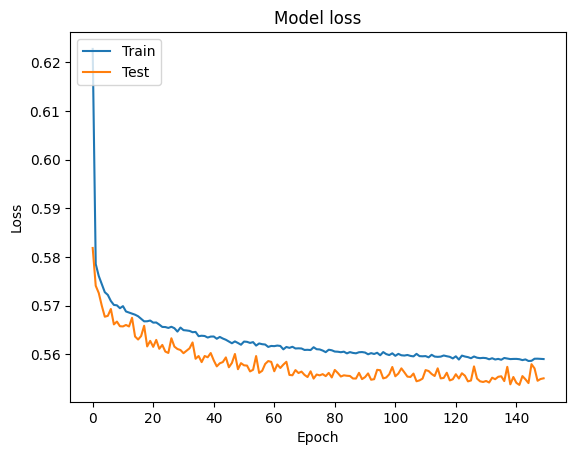

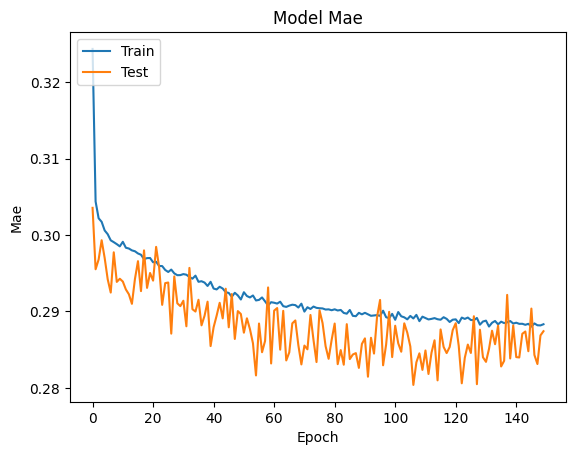

In [19]:
#Let's graph the loss

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')


plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot Mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.ylabel('Mae')


plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)*2

# Round predictions to the nearest valid target (0, 0.5, 1)
valid_targets = np.array([0, 1, 2])
y_pred_int = np.array([valid_targets[np.argmin(np.abs(valid_targets - pred))] for pred in y_pred.flatten()],dtype=int)
y_test_int =np.array(y_test*2,dtype=int)

# Convert predictions and true labels to categorical

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)

# Display results
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred_int, target_names=['B', 'D', 'W']))

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[ 821 1134   19]
 [ 108  975   88]
 [  97  943  525]]

Classification Report:
              precision    recall  f1-score   support

           B       0.80      0.42      0.55      1974
           D       0.32      0.83      0.46      1171
           W       0.83      0.34      0.48      1565

    accuracy                           0.49      4710
   macro avg       0.65      0.53      0.50      4710
weighted avg       0.69      0.49      0.50      4710



In [21]:
"""
# Save the model to an .h5 file
model.save('model4.h5')

# To load the model later

from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')
"""

"\n# Save the model to an .h5 file\nmodel.save('model4.h5')\n\n# To load the model later\n\nfrom tensorflow.keras.models import load_model\nloaded_model = load_model('model.h5')\n"

In [22]:
"""
from keras.models import load_model

modelog=load_model('model2.h5')
"""

"\nfrom keras.models import load_model\n\nmodelog=load_model('model2.h5')\n"

In [23]:
model.get_weights()

[array([[-0.16164246,  0.57262623,  0.02616116,  0.59656376, -0.16636768,
         -0.29203764,  1.0323339 , -0.29066345,  0.17721607, -0.50735414],
        [-0.3048994 , -0.6714727 , -0.25842   ,  0.7419988 ,  0.15045094,
         -0.06974003,  0.05317762,  0.11607911, -0.15804827,  0.04674517],
        [-0.05818384, -1.0113971 ,  0.25714815,  0.51954585,  1.0969472 ,
          1.2241161 , -1.5972052 , -1.0155716 ,  0.60191786,  0.06745017],
        [ 0.40482363,  0.37265906,  0.43845338, -0.16746055,  0.18426858,
         -0.8862309 ,  0.03879194,  0.05864451, -0.31069812,  0.2565982 ],
        [ 0.5380642 ,  0.6664832 , -0.9544701 ,  0.8277755 , -0.34981596,
          0.42234543, -1.6738309 , -1.7601453 ,  0.87940717, -0.883382  ],
        [-0.6016915 ,  0.07263303, -0.2774198 ,  0.30502802, -0.21358612,
          0.24961215, -0.38690826, -0.01379055,  0.2000634 ,  0.19693357]],
       dtype=float32),
 array([ 0.51233137, -0.48740196, -0.62602127, -0.19870257, -0.61581624,
         

In [24]:
import numpy as np

# Set numpy print options for full precision
np.set_printoptions(precision=32, suppress=False, floatmode='maxprec')

# Get and print model weights
weights = model.get_weights()
for i, weight in enumerate(weights):
    if i%2==0:
        print(f"Layer {i//2} weights:")
    else:
        print(f"Layer {i//2} bias:")
    print(weight)
    print("\n")

Layer 0 weights:
[[-0.16164246   0.57262623   0.026161162  0.59656376  -0.16636768
  -0.29203764   1.0323339   -0.29066345   0.17721607  -0.50735414 ]
 [-0.3048994   -0.6714727   -0.25842      0.7419988    0.15045094
  -0.06974003   0.053177617  0.11607911  -0.15804827   0.046745174]
 [-0.05818384  -1.0113971    0.25714815   0.51954585   1.0969472
   1.2241161   -1.5972052   -1.0155716    0.60191786   0.06745017 ]
 [ 0.40482363   0.37265906   0.43845338  -0.16746055   0.18426858
  -0.8862309    0.038791936  0.058644507 -0.31069812   0.2565982  ]
 [ 0.5380642    0.6664832   -0.9544701    0.8277755   -0.34981596
   0.42234543  -1.6738309   -1.7601453    0.87940717  -0.883382   ]
 [-0.6016915    0.07263303  -0.2774198    0.30502802  -0.21358612
   0.24961215  -0.38690826  -0.013790548  0.2000634    0.19693357 ]]


Layer 0 bias:
[ 0.51233137 -0.48740196 -0.62602127 -0.19870257 -0.61581624  0.7904913
 -0.50772274 -0.96529436  2.3598757  -0.41649786]


Layer 1 weights:
[[-0.09745111  -0.4562

In [25]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)


# Model function
def model_manual(input_data, weights):
    """
    Performs forward propagation manually using the given weights.

    Parameters:
    - input_data: numpy array of shape (n_samples, n_features)
    - weights: list containing weights and biases in the order [W0, b0, W1, b1, W2, b2]

    Returns:
    - Output of the model after forward propagation
    """
    # Layer 1: Dense with ReLU activation
    W0, b0 = weights[0], weights[1]
    z1 = np.dot(input_data, W0) + b0
    a1 = relu(z1)

    # Layer 2: Dense with ReLU activation
    W1, b1 = weights[2], weights[3]
    z2 = np.dot(a1, W1) + b1
    a2 = relu(z2)

    # Output Layer: Dense with Sigmoid activation
    W2, b2 = weights[4], weights[5]
    z3 = np.dot(a2, W2) + b2

    return z3